In [86]:
import seaborn as sbn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

sbn.set(font_scale=1.7) #设置字体大小
## 5种主题风格，darkgrid、whitegrid、dark、white、ticks
#常用参数配置
#x,y,hue 数据集变量 变量名
#date 数据集 数据集名
#row,col 更多分类变量进行平铺显示 变量名
#col_wrap 每行的最高平铺数 整数
#estimator 在每个分类中进行矢量到标量的映射 矢量
#ci 置信区间 浮点数或None
#n_boot 计算置信区间时使用的引导迭代次数 整数
#units 采样单元的标识符，用于执行多级引导和重复测量设计 数据变量或向量数据
#order, hue_order 对应排序列表 字符串列表
#row_order, col_order 对应排序列表 字符串列表
#kind : 可选：point 默认, bar 柱形图, count 频次, box 箱体, violin 提琴, strip 散点，swarm 分散点 size 每个面的高度（英寸） 标量 aspect 纵横比 标量 orient 方向 "v"/"h" color 颜色 matplotlib颜色 palette 调色板 seaborn颜色色板或字典 legend hue的信息面板 True/False legend_out 是否扩展图形，并将信息框绘制在中心右边 True/False share{x,y} 共享轴线 True/False

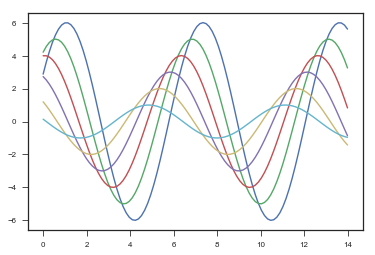

In [124]:
## 折线图
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sbn.set_style('ticks')
sbn.set_context("paper")
sinplot()

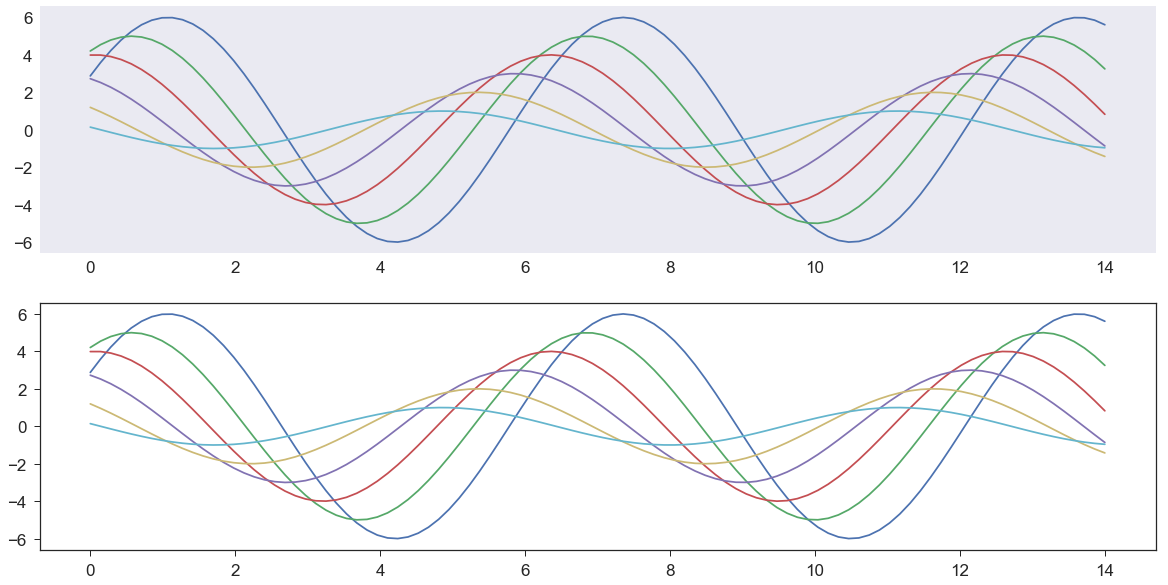

In [127]:
## 画子图，设定不一样的风格
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
plt.figure(figsize=(20,10)) 
sbn.set(font_scale=1.7)
with sbn.axes_style('dark'): ## 设置子图风格
    plt.subplot(211)
    sinplot()
sbn.set_style('ticks')
plt.subplot(212)
sinplot()

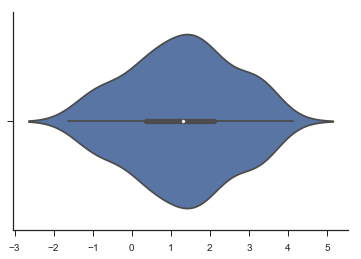

In [18]:
# 小提琴图
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sbn.set_style('ticks')
sbn.violinplot(data)
sbn.despine() ## 去掉上边和右边的线
plt.show()

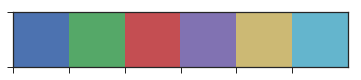

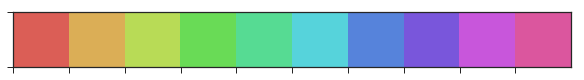

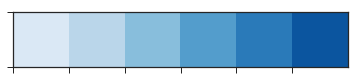

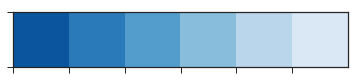

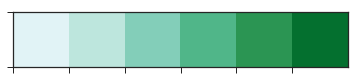

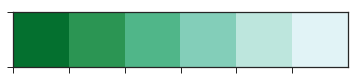

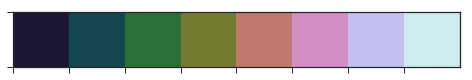

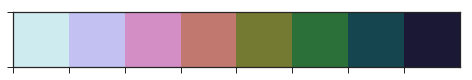

In [129]:
## 默认6种颜色主题
sbn.palplot(sbn.color_palette())
## 获取超过默认6种的颜色
sbn.palplot(sbn.color_palette("hls", 10))
# 渐变色画板
# 由浅到深
sbn.palplot(sbn.color_palette("Blues"))
# 由深到浅,后面加'_r'
sbn.palplot(sbn.color_palette("Blues_r"))
sbn.palplot(sbn.color_palette("BuGn"))
sbn.palplot(sbn.color_palette("BuGn_r"))
# 色调线性变换
sbn.palplot(sbn.color_palette("cubehelix", 8))
sbn.palplot(sbn.color_palette("cubehelix_r", 8))

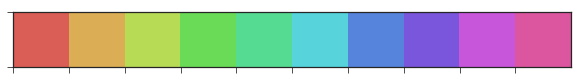

In [33]:

sbn.palplot(sbn.color_palette("hls", 10))

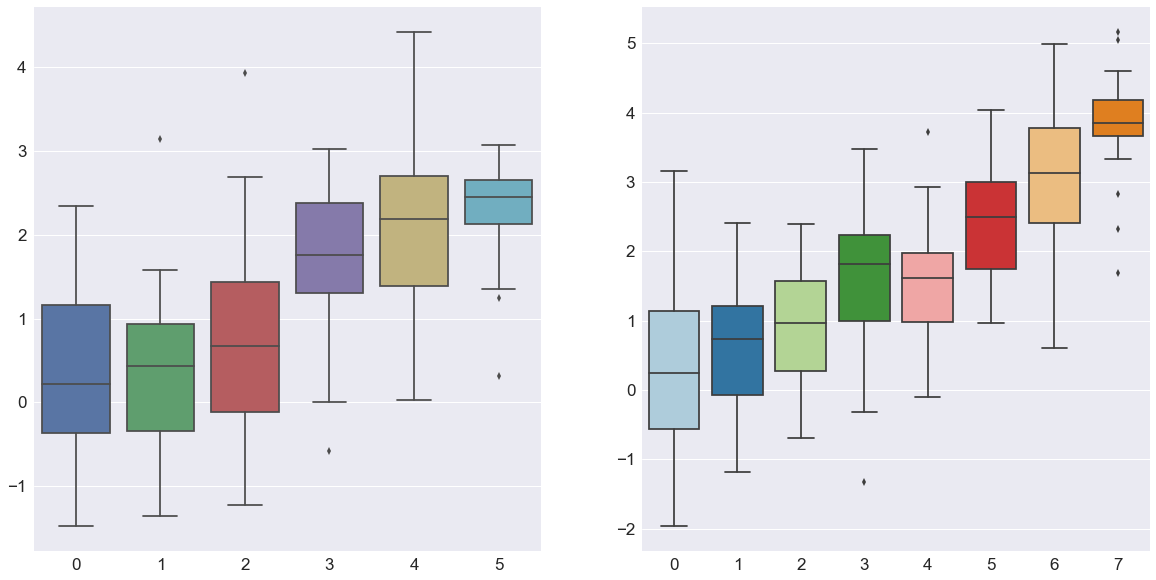

In [132]:
# 盒图
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sbn.set_style('ticks')
sbn.set(font_scale=1.7)
plt.figure(figsize=(20,10))
plt.subplot(121)
sbn.boxplot(data=data)
sbn.despine() ## 去掉上边和右边的线
## 画超过默认6种颜色的图
plt.subplot(122)
data2 = np.random.normal(size=(20, 8)) + np.arange(8) / 2
sbn.boxplot(data=data2,palette=sbn.color_palette("Paired", 8))
plt.show()

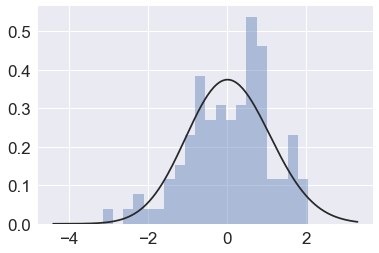

In [87]:
# 直方图,观察单变量的分布
from scipy import stats, integrate
x = np.random.normal(size=100) # 高斯数据
sbn.distplot(x,bins=20,kde=False,fit=stats.gamma) # bins:数据分成多少份
plt.show()

          x         y
0 -0.426568  1.286331
1  0.860509  1.190358
2  0.782728 -0.095805
3 -0.062093 -0.742105
4  0.813073  0.432619
x    0.106203
y    0.986998
dtype: float64


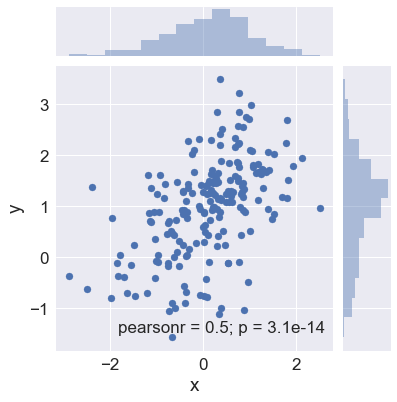

In [89]:
# 散点图，观察两个变量之间的关系
mean, cov = [0, 1], [(1, 0.5), (0.5, 1)] # 均值，方差
data = np.random.multivariate_normal(mean, cov, 200) # 根据均值,方差生成数据
df = pd.DataFrame(data, columns=["x", "y"])
print(df.head())
print(df.mean())
plt.figure(figsize=(20,10))
sbn.set_style('darkgrid')
sbn.jointplot(x='x',y='y',data=df)
plt.show()

          x         y
0 -0.236392  2.204111
1 -2.594020  0.067564
2 -0.197317  0.151633
3  1.142238  2.172414
4 -0.155812  0.365225
x   -0.012141
y    1.010152
dtype: float64


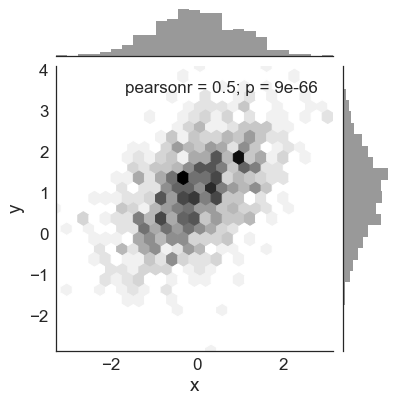

In [90]:
# hex图，数据量大的时候用,观察两个变量之间的关系
mean, cov = [0, 1], [(1, 0.5), (0.5, 1)] # 均值，方差
data = np.random.multivariate_normal(mean, cov, 1000) # 根据均值,方差生成数据
df = pd.DataFrame(data, columns=["x", "y"])
print(df.head())
print(df.mean())
sbn.set_style('white')
sbn.jointplot(x='x',y='y',data=df,kind="hex", color="k")
plt.show()

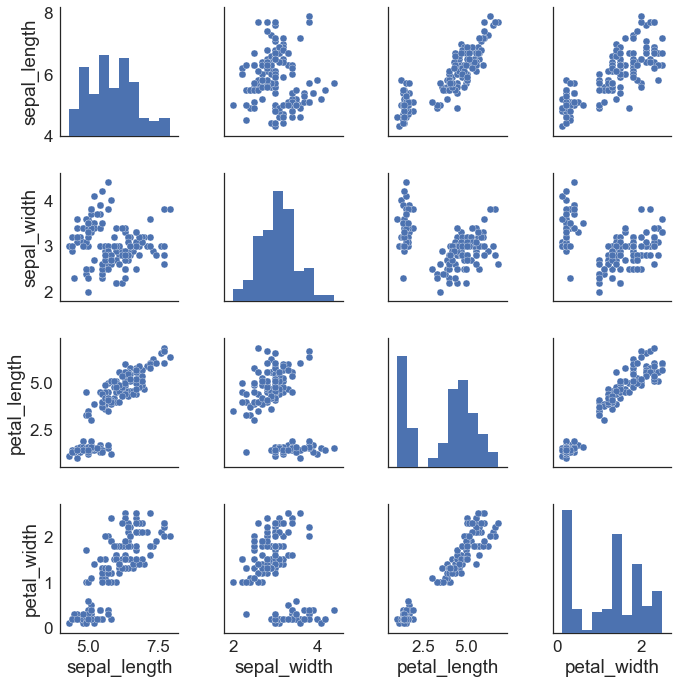

In [93]:
# 多特征,两两组合观察变量关系
iris = sbn.load_dataset("iris")
sbn.pairplot(iris)
plt.show()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


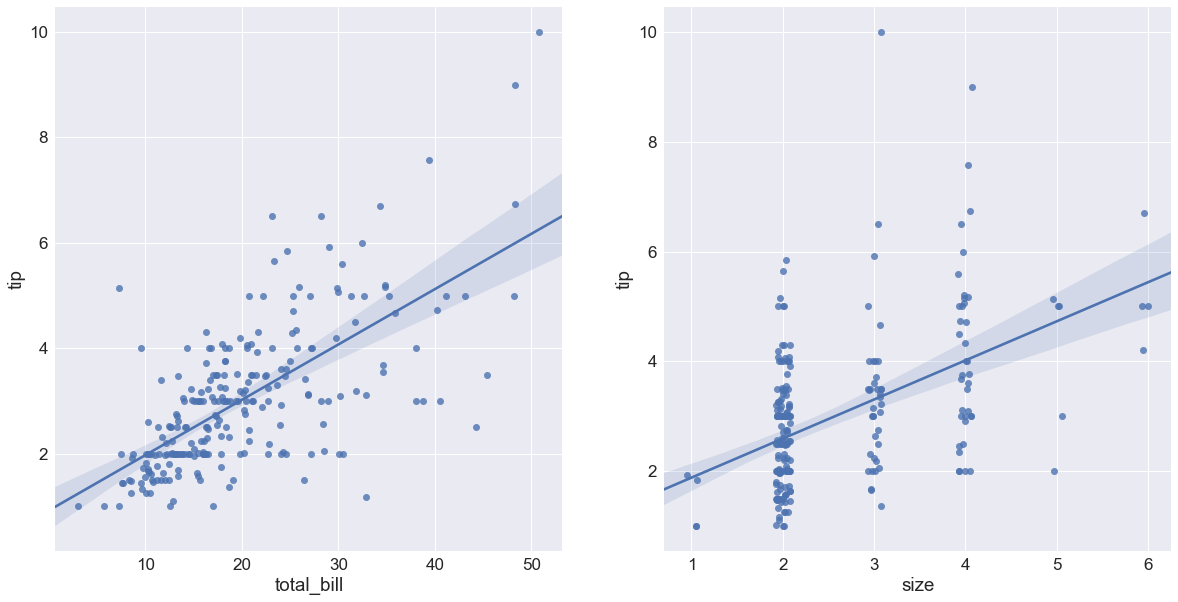

In [133]:
# 回归分析图绘制
tips = sbn.load_dataset("tips")

print(tips.head())

plt.figure(figsize=(20,10))
sbn.set(font_scale=1.7)
#regplot()和lmplot()都可以绘制回归关系,推荐regplot()
plt.subplot(121)
sbn.regplot(x='total_bill',y='tip',data=tips)
## 添加浮动范围x_jitter
plt.subplot(122)
sbn.regplot(x='size',y='tip',data=tips,x_jitter=0.08)
plt.show()

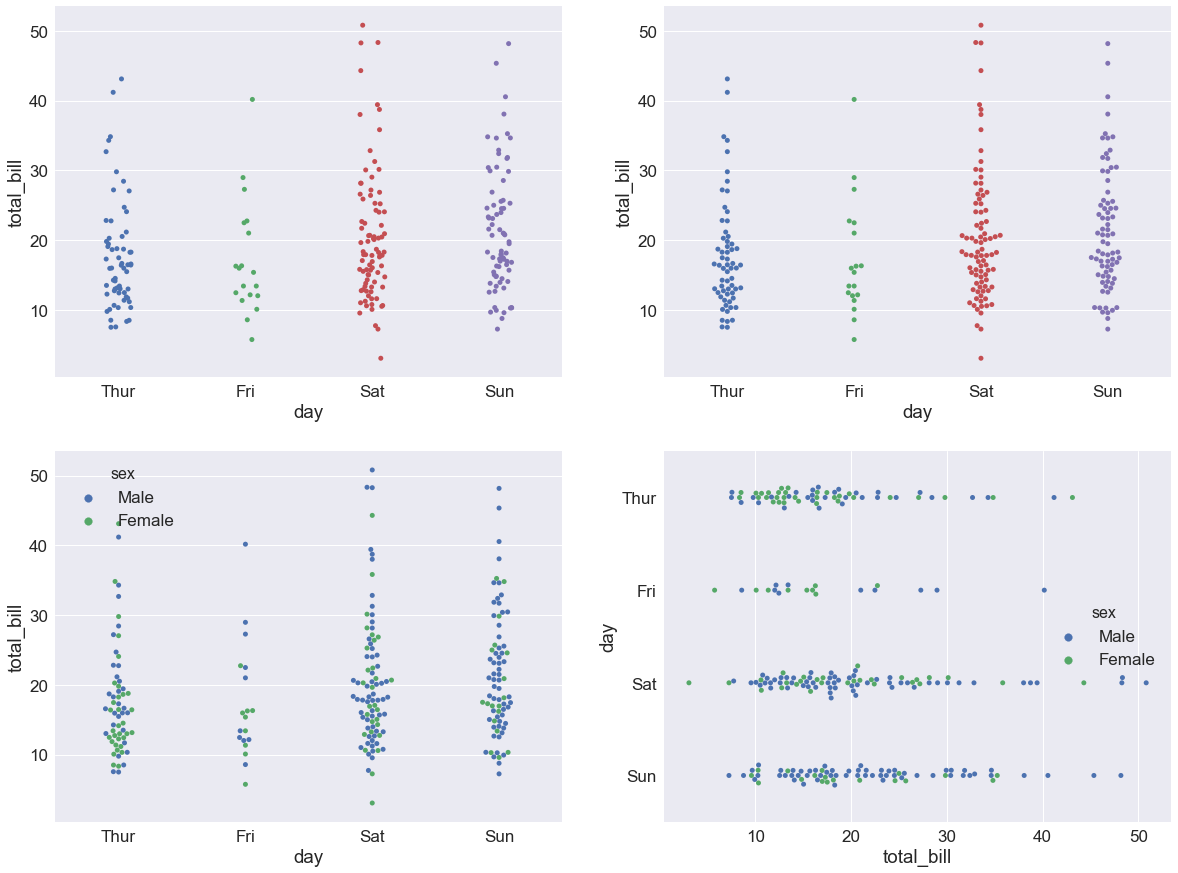

In [98]:
# 蜂群图，多变量分析绘图
tips = sbn.load_dataset("tips")
sbn.set(font_scale=1.7)
plt.figure(figsize=(20,15))
plt.subplot(221)
sbn.stripplot(x="day", y="total_bill", data=tips,jitter=True)
plt.subplot(222)
sbn.swarmplot(x="day", y="total_bill", data=tips)
plt.subplot(223)
sbn.swarmplot(x="day", y="total_bill", hue="sex",data=tips)
plt.subplot(224)
sbn.swarmplot(x="total_bill", y="day", hue="sex",data=tips)
plt.show()

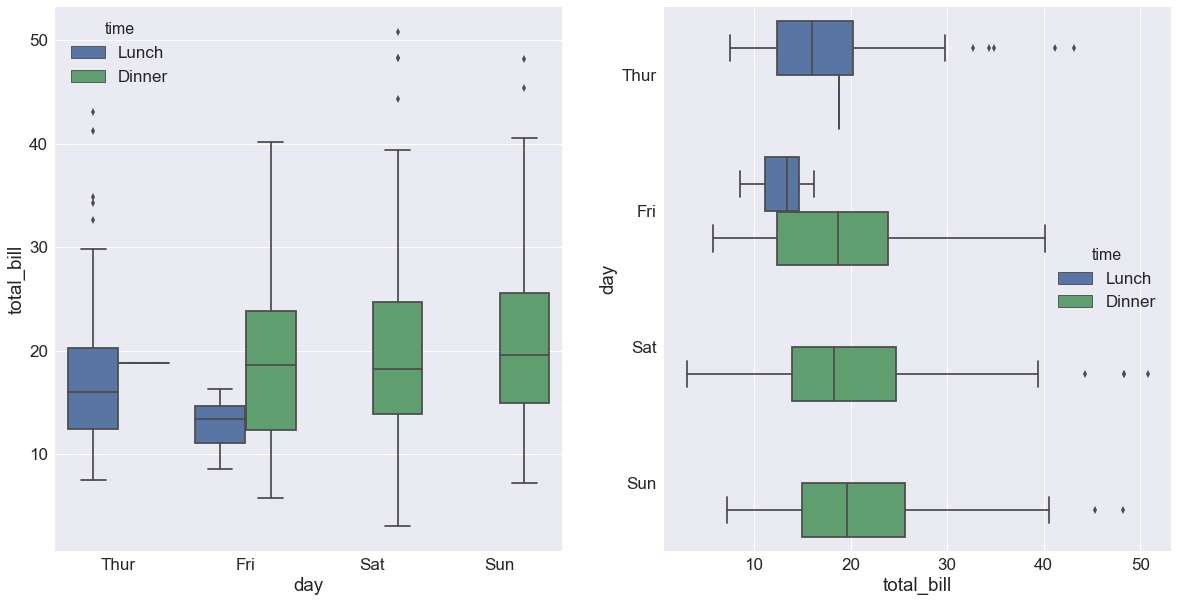

In [104]:
## 盒图
tips = sbn.load_dataset("tips")
plt.figure(figsize=(20,10))
sbn.set(font_scale=1.7)
plt.subplot(121)
sbn.boxplot(x="day", y="total_bill", hue="time", data=tips)
plt.subplot(122)
sbn.boxplot(x="total_bill", y="day", hue="time", data=tips)
plt.show()

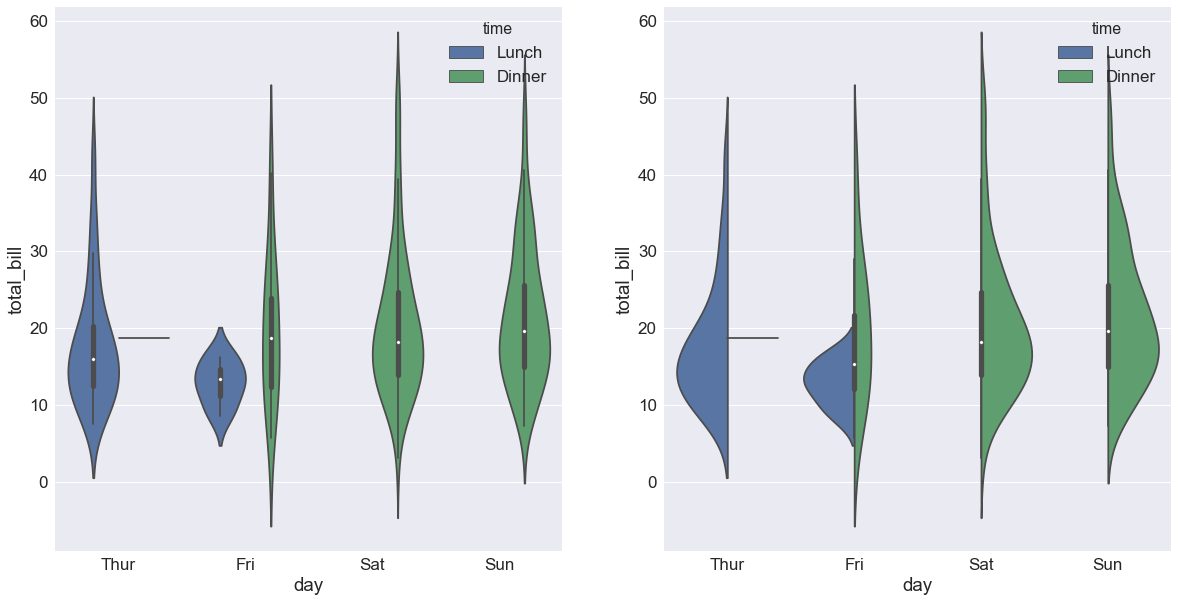

In [103]:
## 小提琴图
tips = sbn.load_dataset("tips")
plt.figure(figsize=(20,10))
sbn.set(font_scale=1.7)
plt.subplot(121)
sbn.violinplot(x="day", y="total_bill", hue="time", data=tips)
plt.subplot(122)
sbn.violinplot(x="day", y="total_bill", hue="time", data=tips,split=True)
plt.show()

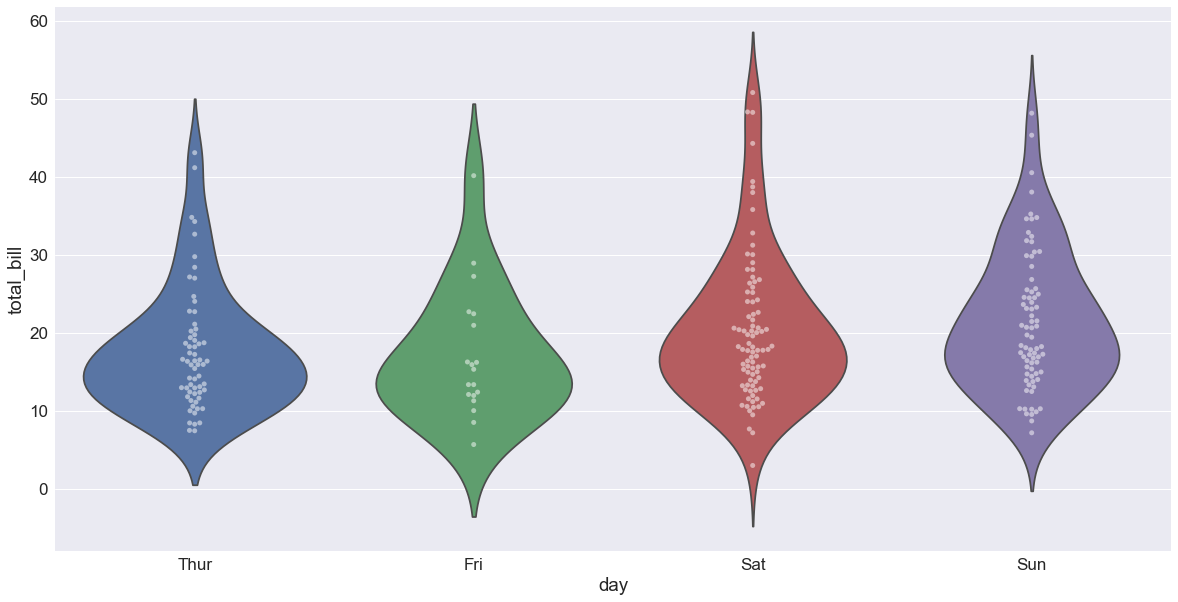

In [105]:
## 小提琴图和蜂群图结合
tips = sbn.load_dataset("tips")
plt.figure(figsize=(20,10))
sbn.set(font_scale=1.7)
sbn.violinplot(x="day", y="total_bill", data=tips, inner=None)
sbn.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5)
plt.show()

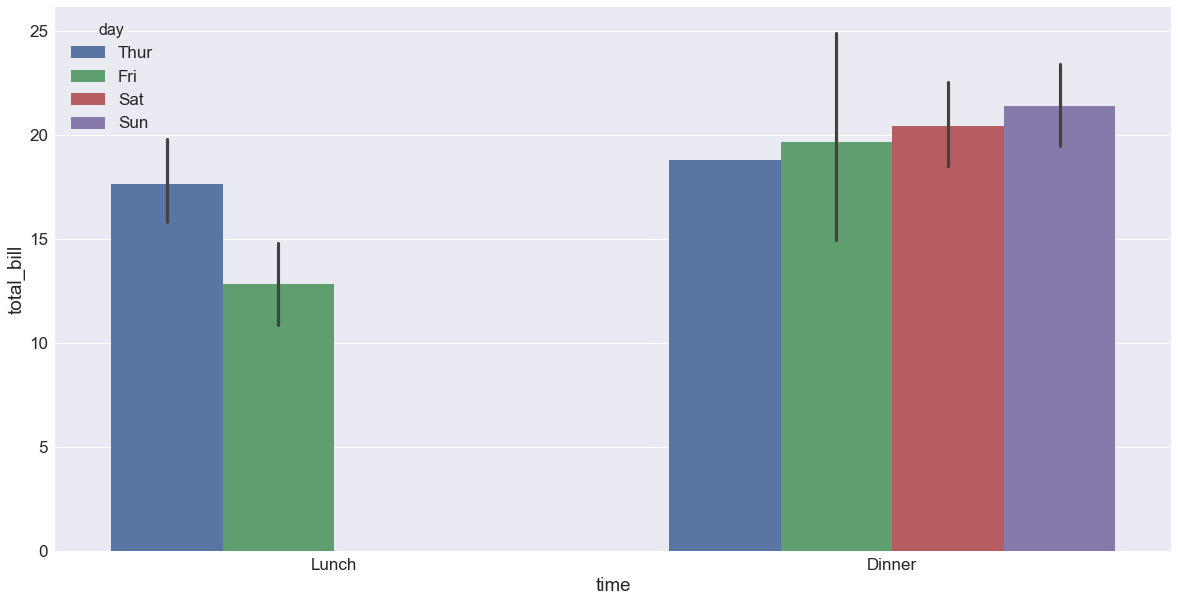

In [107]:
# 柱状图
tips = sbn.load_dataset("tips")
plt.figure(figsize=(20,10))
sbn.set(font_scale=1.7)
sbn.barplot(x="time", y="total_bill", hue="day", data=tips)
plt.show()

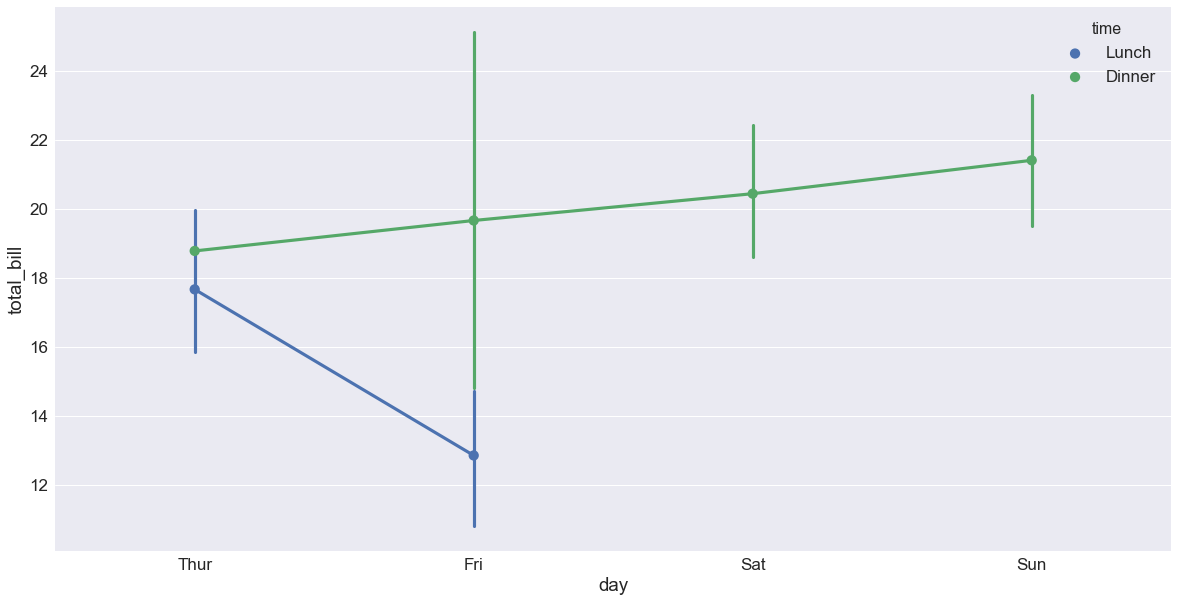

In [119]:
# 点图，查看趋势
tips = sbn.load_dataset("tips")
plt.figure(figsize=(20,10))
sbn.set(font_scale=1.7)
sbn.pointplot(x="day", y="total_bill", hue="time", data=tips)
plt.show()

   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121
year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
January     112   115   145   171   196   204   242   284   315   340   360   
February    118   126   150   180   196   188   233   277   301   318   342   
March       132   141   178   193   236   235   267   317   356   362   406   
April       129   135   163   181   235   227   269   313   348   348   396   
May         121   125   172   183   229   234   270   318   355   363   420   
June        135   149   178   218   243   264   315   374   422   435   472   
July        148   170   199   230   264   302   364   413   465   491   548   
August      148   170   199   242   272   293   347   405   467   505   559   
September   136   158   184   

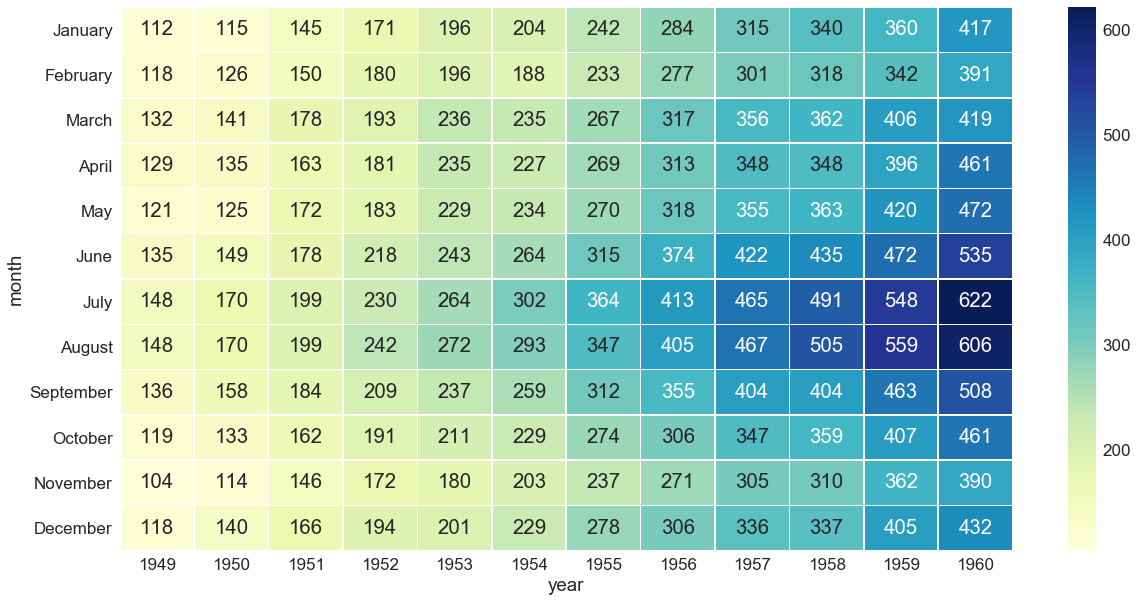

In [122]:
# 热力图
flights = sbn.load_dataset("flights")
print(flights.head())
plt.figure(figsize=(20,10))
flights = flights.pivot("month", "year", "passengers")
print (flights)
sbn.heatmap(flights,annot=True,fmt="d", linewidths=0.5, cmap="YlGnBu")
plt.show()